In [1]:
!pip install kaggle

from google.colab import files
files.upload()

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

!unzip chest-xray-pneumonia.zip

Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating:

Showing normal chest X-ray images:
Showing pneumonia chest X-ray images:


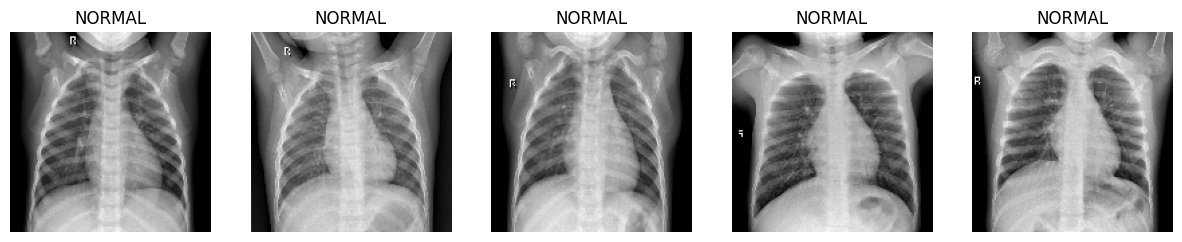

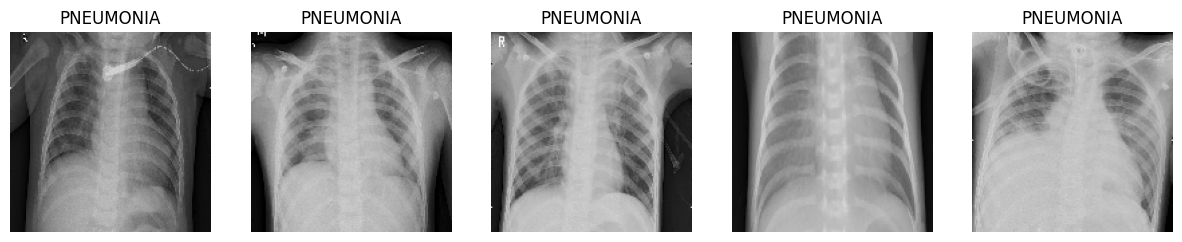

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow.keras.preprocessing import image

# Set the dataset directory
train_normal_dir = os.path.join('/content/chest_xray/chest_xray/train/NORMAL')
train_pneumonia_dir = os.path.join('/content/chest_xray/chest_xray/train/PNEUMONIA')

# Function to display images
def display_images_from_directory(directory, label, n_images=5):
    all_images = os.listdir(directory)
    selected_images = random.sample(all_images, n_images)

    plt.figure(figsize=(15, 15))

    for i, img_name in enumerate(selected_images):
        img_path = os.path.join(directory, img_name)
        img = image.load_img(img_path, target_size=(150, 150))
        img_array = image.img_to_array(img) / 255.0

        plt.subplot(1, n_images, i+1)
        plt.imshow(img_array)
        plt.title(label)
        plt.axis('off')

# Display images from both NORMAL and PNEUMONIA classes
print("Showing normal chest X-ray images:")
display_images_from_directory(train_normal_dir, label='NORMAL')

print("Showing pneumonia chest X-ray images:")
display_images_from_directory(train_pneumonia_dir, label='PNEUMONIA')

plt.show()

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 1352s 8s/step - accuracy: 0.8273 - loss: 0.3826 - val_accuracy: 0.8125 - val_loss: 0.3944
Epoch 2/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 1407s 8s/step - accuracy: 0.9196 - loss: 0.1927 - val_accuracy: 0.8125 - val_loss: 0.3796
Epoch 3/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 1401s 8s/step - accuracy: 0.9200 - loss: 0.1909 - val_accuracy: 0.8750 - val_loss: 0.2958
Epoch 4/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 1396s 8s/step - accuracy: 0.9300 - loss: 0.1735 - val_accuracy: 0.8125 - val_loss: 0.3525
Epoch 5/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 1344s 8s/step - accuracy: 0.9386 - loss: 0.1544 - val_accuracy: 0.7500 - val_loss: 0.5856
Epoch 6/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 1397s 8s/step - accuracy: 0.9257 - loss: 0.1733 - val_accuracy: 0.8750 - val_loss: 0.3772
Epoch 7/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 1320s 8s/step - accuracy: 0.9366 - loss: 0.1574 - val_accuracy: 0.7500 - val_loss: 0.5864
Epoch 8/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 1311s 8s/step - accuracy: 0.9468 - loss: 0.1414 - val_accurac

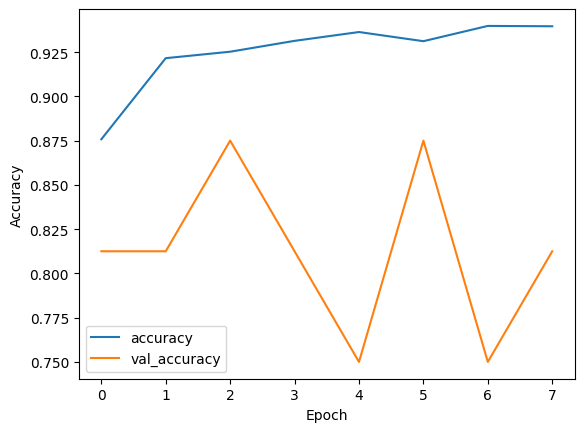

Found 624 images belonging to 2 classes.
20/20 ━━━━━━━━━━━━━━━━━━━━ 153s 8s/step - accuracy: 0.8863 - loss: 0.3622
Test accuracy: 0.92


In [5]:
# Import necessary libraries
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Import necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Set the dataset directory
base_dir = '/content/chest_xray/chest_xray'

# Define directories for training, validation, and test
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
val_dir = os.path.join(base_dir, 'val')

# Set up ImageDataGenerator for data augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
                                    rotation_range=20,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)

# Create generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

# Load the pre-trained VGG16 model + higher level layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Freeze the convolutional layers
for layer in base_model.layers:
    layer.trainable = False

# Create the model
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Train the model
history = model.fit(train_generator,
                    epochs=20,
                    validation_data=validation_generator,
                    callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model on the test set
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# Calculate test accuracy
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy:.2f}')

20/20 ━━━━━━━━━━━━━━━━━━━━ 153s 8s/step
Accuracy: 0.92


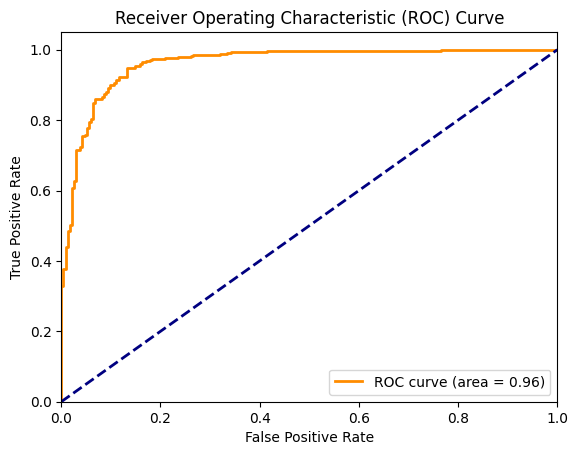

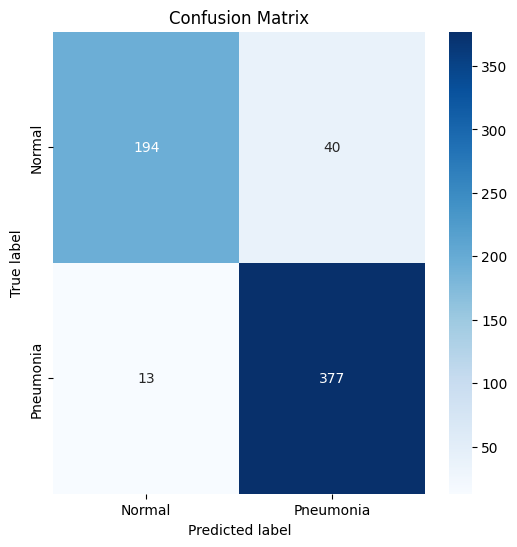

              precision    recall  f1-score   support

      Normal       0.94      0.83      0.88       234
   Pneumonia       0.90      0.97      0.93       390

    accuracy                           0.92       624
   macro avg       0.92      0.90      0.91       624
weighted avg       0.92      0.92      0.91       624

Precision: 0.90
Recall: 0.97
F1 Score: 0.93


In [6]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

# Get predictions on the test set
y_pred_probs = model.predict(test_generator)
y_pred_classes = (y_pred_probs > 0.5).astype(int).ravel()  # Convert probabilities to binary (0 or 1)
y_true = test_generator.classes  # True labels

# 1. Calculate accuracy
accuracy = accuracy_score(y_true, y_pred_classes)
print(f'Accuracy: {accuracy:.2f}')

# 2. Generate and plot ROC curve
fpr, tpr, _ = roc_curve(y_true, y_pred_probs)  # fpr: false positive rate, tpr: true positive rate
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# 3. Calculate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Pneumonia'], yticklabels=['Normal', 'Pneumonia'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

# 4. Print precision, recall, F1-score, and support
report = classification_report(y_true, y_pred_classes, target_names=['Normal', 'Pneumonia'])
print(report)

# Additionally, if you want the precision, recall, and F1 score individually:
precision = precision_score(y_true, y_pred_classes)
recall = recall_score(y_true, y_pred_classes)
f1 = f1_score(y_true, y_pred_classes)
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

ResNet50

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Epoch 1/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 586s 4s/step - accuracy: 0.7179 - loss: 0.6252 - val_accuracy: 0.5625 - val_loss: 0.6489
Epoch 2/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 620s 3s/step - accuracy: 0.7598 - loss: 0.4913 - val_accuracy: 0.5625 - val_loss: 0.7406
Epoch 3/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 620s 3s/step - accuracy: 0.7665 - loss: 0.4701 - val_accuracy: 0.6250 - val_loss: 0.6360
Epoch 4/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 572s 3s/step - accuracy: 0.7771 - loss: 0.4579 - val_accuracy: 0.5625 - val_loss: 0.8272
Epoch 5/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 616s 3s/step - accuracy: 0.7822 - loss: 0.4488 - val_accuracy: 0.5625 - val_loss: 0.7955
20/20 ━━━━━━━━━━━━━━━━━━━━ 59s 3s/step
Accuracy: 0.71


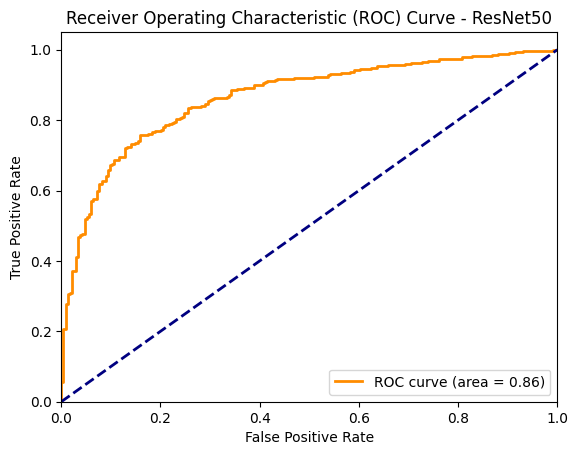

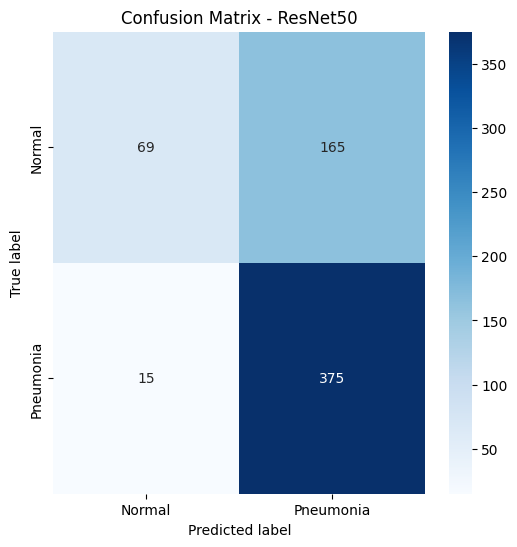

              precision    recall  f1-score   support

      Normal       0.82      0.29      0.43       234
   Pneumonia       0.69      0.96      0.81       390

    accuracy                           0.71       624
   macro avg       0.76      0.63      0.62       624
weighted avg       0.74      0.71      0.67       624



In [7]:
from tensorflow.keras.applications import ResNet50
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the pre-trained ResNet50 model + higher level layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Freeze the convolutional layers
for layer in base_model.layers:
    layer.trainable = False

# Create the model
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, epochs=20, validation_data=validation_generator, callbacks=[early_stopping])

# Predictions and Metrics
y_pred_probs = model.predict(test_generator)
y_pred_classes = (y_pred_probs > 0.5).astype(int).ravel()  # Convert probabilities to binary (0 or 1)
y_true = test_generator.classes  # True labels

# 1. Accuracy
accuracy = accuracy_score(y_true, y_pred_classes)
print(f'Accuracy: {accuracy:.2f}')

# 2. ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_true, y_pred_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - ResNet50')
plt.legend(loc="lower right")
plt.show()

# 3. Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Pneumonia'], yticklabels=['Normal', 'Pneumonia'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix - ResNet50')
plt.show()

# 4. Precision, Recall, F1-score
report = classification_report(y_true, y_pred_classes, target_names=['Normal', 'Pneumonia'])
print(report)

InceptionV3

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Epoch 1/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 329s 2s/step - accuracy: 0.8311 - loss: 0.7018 - val_accuracy: 0.8125 - val_loss: 0.5794
Epoch 2/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 319s 2s/step - accuracy: 0.8967 - loss: 0.2470 - val_accuracy: 0.6875 - val_loss: 0.6732
Epoch 3/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 316s 2s/step - accuracy: 0.9115 - loss: 0.2231 - val_accuracy: 0.7500 - val_loss: 0.7259
Epoch 4/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 323s 2s/step - accuracy: 0.9134 - loss: 0.2172 - val_accuracy: 0.7500 - val_loss: 0.6703
Epoch 5/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 314s 2s/step - accuracy: 0.9112 - loss: 0.2216 - val_accuracy: 0.8750 - val_loss: 0.4564
20/20 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step
Accuracy: 0.87


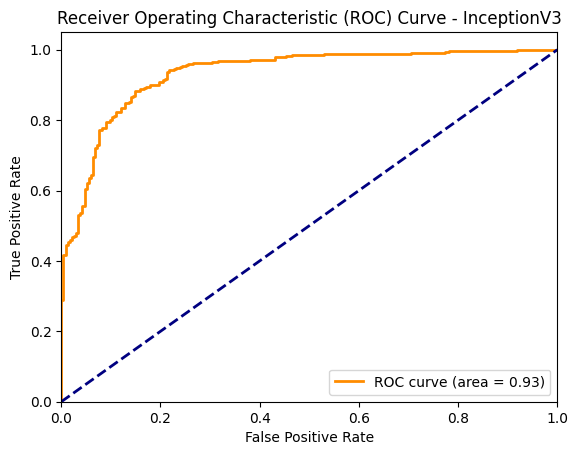

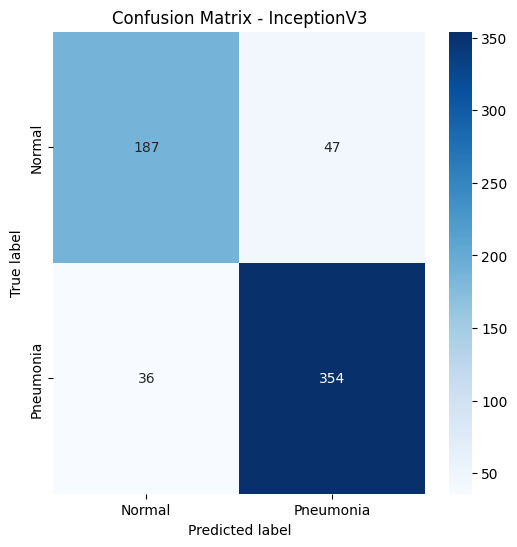

              precision    recall  f1-score   support

      Normal       0.84      0.80      0.82       234
   Pneumonia       0.88      0.91      0.90       390

    accuracy                           0.87       624
   macro avg       0.86      0.85      0.86       624
weighted avg       0.87      0.87      0.87       624



In [8]:
from tensorflow.keras.applications import InceptionV3

# Load the pre-trained InceptionV3 model + higher level layers
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Freeze the convolutional layers
for layer in base_model.layers:
    layer.trainable = False

# Create the model
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, epochs=20, validation_data=validation_generator, callbacks=[early_stopping])

# Predictions and Metrics (Same as before)
y_pred_probs = model.predict(test_generator)
y_pred_classes = (y_pred_probs > 0.5).astype(int).ravel()
y_true = test_generator.classes

# 1. Accuracy
accuracy = accuracy_score(y_true, y_pred_classes)
print(f'Accuracy: {accuracy:.2f}')

# 2. ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_true, y_pred_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - InceptionV3')
plt.legend(loc="lower right")
plt.show()

# 3. Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Pneumonia'], yticklabels=['Normal', 'Pneumonia'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix - InceptionV3')
plt.show()

# 4. Precision, Recall, F1-score
report = classification_report(y_true, y_pred_classes, target_names=['Normal', 'Pneumonia'])
print(report)

MobileNetV2

<ipython-input-10-3413eeeb01ec>:12: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(150, 150, 3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 216s 1s/step - accuracy: 0.8365 - loss: 0.6434 - val_accuracy: 0.6875 - val_loss: 0.6010
Epoch 2/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 208s 1s/step - accuracy: 0.9164 - loss: 0.1986 - val_accuracy: 0.7500 - val_loss: 0.3810
Epoch 3/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 209s 1s/step - accuracy: 0.9157 - loss: 0.2013 - val_accuracy: 0.6250 - val_loss: 1.2397
Epoch 4/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 264s 1s/step - accuracy: 0.9276 - loss: 0.1847 - val_accuracy: 0.6875 - val_loss: 0.5952
Epoch 5/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 209s 1s/step - accuracy: 0.9356 - loss: 0.1717 - val_accuracy: 0.6875 - val_loss: 0.5717
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 798ms/step
Accuracy: 0.85


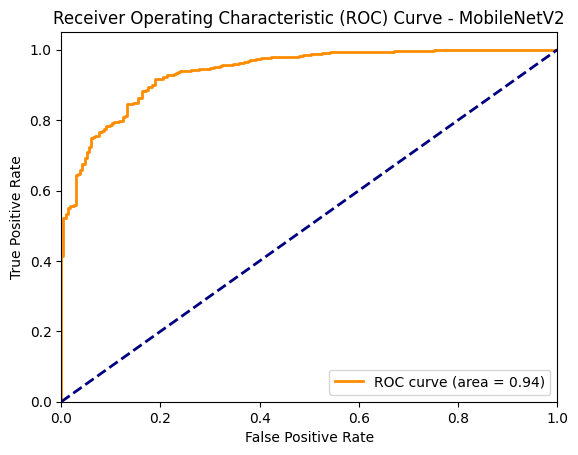

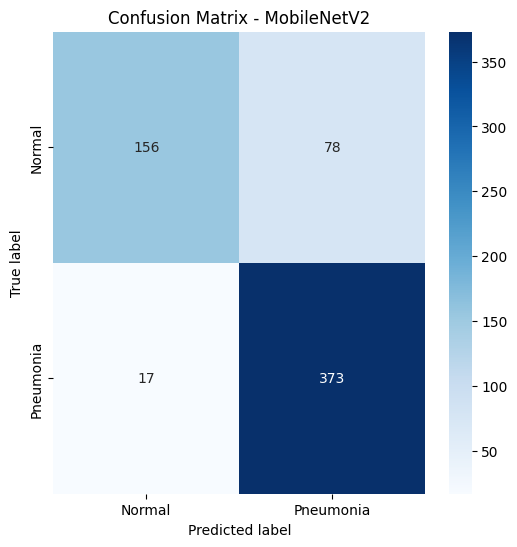

Classification Report:
               precision    recall  f1-score   support

      Normal       0.90      0.67      0.77       234
   Pneumonia       0.83      0.96      0.89       390

    accuracy                           0.85       624
   macro avg       0.86      0.81      0.83       624
weighted avg       0.86      0.85      0.84       624

Precision: 0.83
Recall: 0.96
F1 Score: 0.89


In [10]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the pre-trained MobileNetV2 model + higher level layers
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Freeze the convolutional layers
for layer in base_model.layers:
    layer.trainable = False

# Create the model
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, epochs=20, validation_data=validation_generator, callbacks=[early_stopping])

# Predictions and Metrics
y_pred_probs = model.predict(test_generator)  # Probabilities
y_pred_classes = (y_pred_probs > 0.5).astype(int).ravel()  # Convert probabilities to binary (0 or 1)
y_true = test_generator.classes  # True labels

# 1. Accuracy
accuracy = accuracy_score(y_true, y_pred_classes)
print(f'Accuracy: {accuracy:.2f}')

# 2. ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_true, y_pred_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - MobileNetV2')
plt.legend(loc="lower right")
plt.show()

# 3. Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Pneumonia'], yticklabels=['Normal', 'Pneumonia'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix - MobileNetV2')
plt.show()

# 4. Precision, Recall, F1-score
report = classification_report(y_true, y_pred_classes, target_names=['Normal', 'Pneumonia'])
print("Classification Report:\n", report)

# You can also calculate precision, recall, and F1 manually if needed:
precision = precision_score(y_true, y_pred_classes)
recall = recall_score(y_true, y_pred_classes)
f1 = f1_score(y_true, y_pred_classes)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")